# Regresión logística usando Scikit Learn

## Importar liberías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar y explorar el set de datos

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [ ]:
digits.data.shape

(1797, 64)

In [ ]:
digit_sample = digits.data[0]
digit_sample

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Al ser un problema de aprendizaje supervisado, se cuenta con datos ya etiquetados a los que se quiere llegar como resultado.

In [ ]:
digits.target.shape

(1797,)

El primer valor de los datos etiquetados corresponde a un 0

In [ ]:
digits.target[0]

0

## Graficar una imagen

In [ ]:
digit_reshaped = digit_sample.reshape(8,8)
digit_reshaped

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

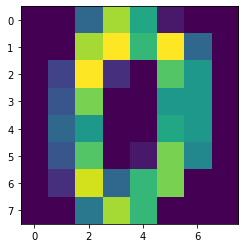

In [ ]:
plt.imshow(digit_reshaped)

## Graficar varias imágenes

In [ ]:
numbers_sample = list(zip(digits.data[30:40], digits.target[30:40]))
numbers_sample

[(array([ 0.,  0., 10., 14., 11.,  3.,  0.,  0.,  0.,  4., 16., 13.,  6.,
         14.,  1.,  0.,  0.,  4., 16.,  2.,  0., 11.,  7.,  0.,  0.,  8.,
         16.,  0.,  0., 10.,  5.,  0.,  0.,  8., 16.,  0.,  0., 14.,  4.,
          0.,  0.,  8., 16.,  0.,  1., 16.,  1.,  0.,  0.,  4., 16.,  1.,
         11., 15.,  0.,  0.,  0.,  0., 11., 16., 12.,  3.,  0.,  0.]), 0),
 (array([ 0.,  0.,  2., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16.,
          6.,  0.,  0.,  0.,  0.,  5., 15., 13., 11.,  0.,  0.,  0.,  0.,
          0.,  7., 16., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  3.,
          0.,  0.,  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  3.,
          4.,  4., 16.,  2.,  0.,  0.,  2., 15., 13., 14., 13.,  2.]), 9),
 (array([ 0.,  2., 13., 16., 16., 16., 11.,  0.,  0.,  5., 16., 10.,  5.,
          4.,  1.,  0.,  0.,  6., 16.,  7.,  3.,  0.,  0.,  0.,  0.,  9.,
         16., 16., 16.,  6.,  0.,  0.,  0.,  3.,  8.,  4., 11., 15.,  0.,
          0.,  0.,  0.,  0.,  1., 12

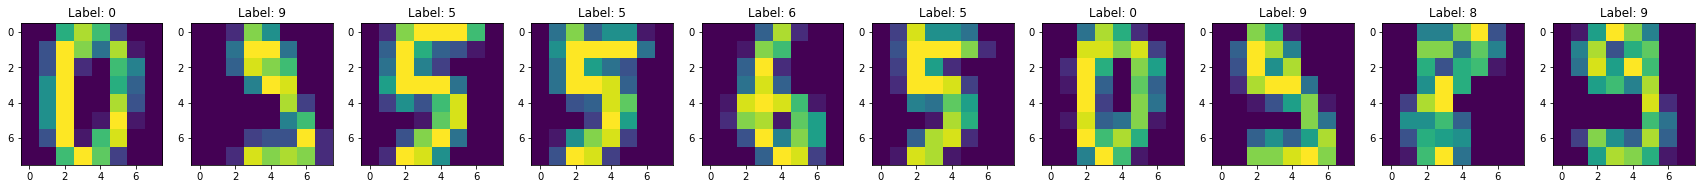

In [ ]:
plt.figure(figsize=(30, 30))

for index, (image, label) in enumerate(numbers_sample):
    digit_reshaped = image.reshape(8, 8)
    plt.subplot(1, len(numbers_sample), index + 1)
    plt.imshow(digit_reshaped)
    plt.title(f'Label: {label}')

## Fase de entrenamiento

### 1. Dividir el set de datos para entrenamiento y pruebas

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits.data,
                                                   digits.target,
                                                   test_size=0.1,
                                                   random_state=42)

print('Length Train:', len(x_train))
print('Length Test:', len(x_test))

Length Train: 1617
Length Test: 180


### 2. Importar el modelo

In [ ]:
from sklearn.linear_model import LogisticRegression

### 3. Crear la instancia del modelo

Se crea el primer Pipeline.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), LogisticRegression())

### 4. Entrenar al modelo

Primero se estandarizan los datos y luego se entrena al modelo.

In [ ]:
pipe.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

## Evaluar al modelo

La regresión logística con SciKit Learn usa por defecto la precisión como métrica de evaluación del modelo. La precisión se define como:

$$\text{Precisión}=\frac{\text{Número de predicciones correctas}}{\text{Número total de predicciones}}$$

In [ ]:
score = pipe.score(x_test, y_test)
print(f'Score: {score} = {round(score * 100, 2)}% Aprox')

Score: 0.9777777777777777 = 97.78% Aprox


## Hacer una predicción con el modelo

In [ ]:
guinea_pig = x_test[0]
pipe.predict(guinea_pig.reshape(1, -1))

array([6])

Ahora se va a evaluar si la predicción es correcta.

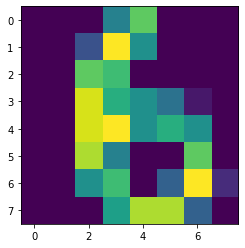

In [ ]:
plt.imshow(guinea_pig.reshape(8, 8))

A continuación, se hacen todas las predicciones de manera global

In [ ]:
predictions = pipe.predict(x_test)
predictions

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 3, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2])

## Crear y graficar una matriz de confusión


In [ ]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[17,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 17,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 16,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 25,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 22,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 19,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 18,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 23]])

Text(60.0, 0.5, 'Valor actual')

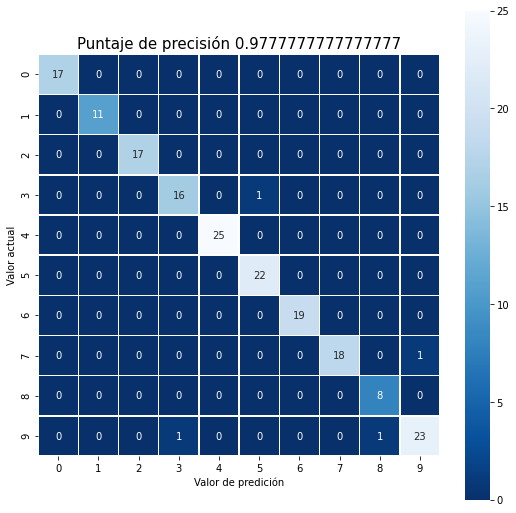

In [ ]:
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, linewidths=0.5,
            square=True, cmap='Blues_r')

plt.title(f'Puntaje de precisión {score}', fontsize=15)
plt.xlabel('Valor de predición')
plt.ylabel('Valor actual')

La forma de leer esto es la siguiente:

- Los valores que estan en la diagonal son la cantidad de predicciones correctas.
- El cero indica que la predición en ese caso fue acertada.
- El uno indica que la predición en ese caso fue incorrecta y en que lugar fallo.